# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

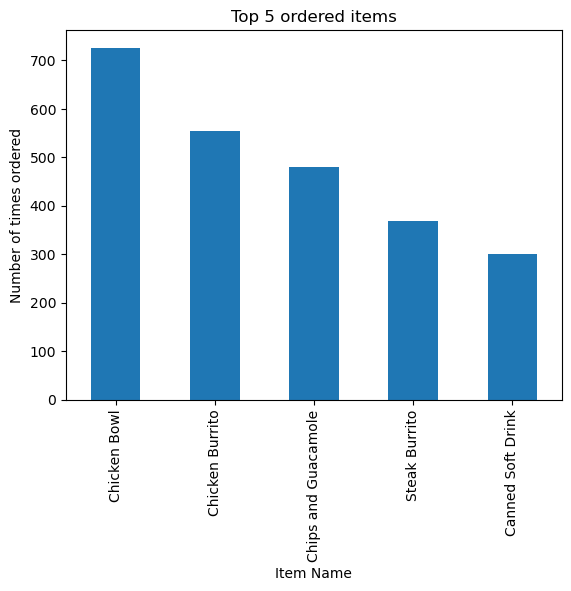

In [52]:
x = chipo.item_name

counts = Counter(x)

df = pd.DataFrame.from_dict(counts, orient='index')

df = df[0].sort_values(ascending= False)[:5]

df.plot(kind = 'bar')

plt.xlabel('Item Name')
plt.ylabel('Number of times ordered')
plt.title('Top 5 ordered items')

plt.show()

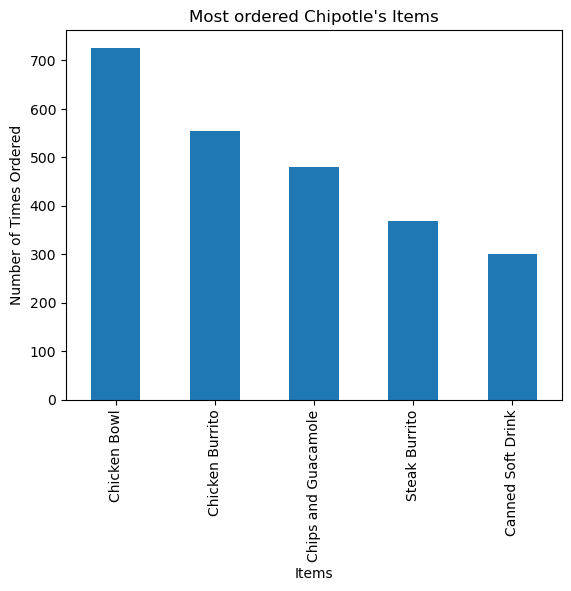

In [15]:
x = chipo.item_name

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient='index')

df = df[0].sort_values( ascending = False)[:5]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0.0, 36.7)

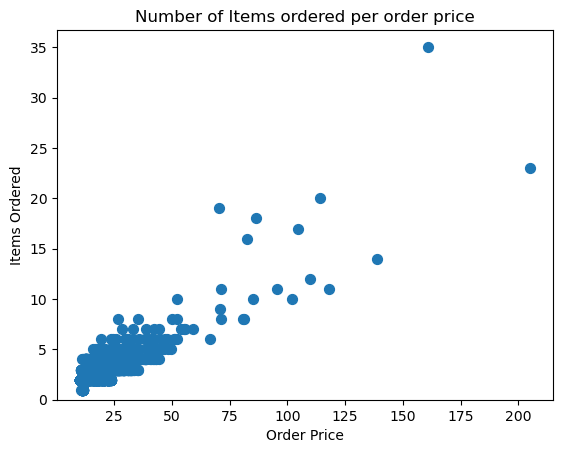

In [53]:
chipo.item_price = [float(value) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y= orders.quantity, s= 50)

plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.title('Number of Items ordered per order price')
plt.ylim(0)

(0.0, 36.7)

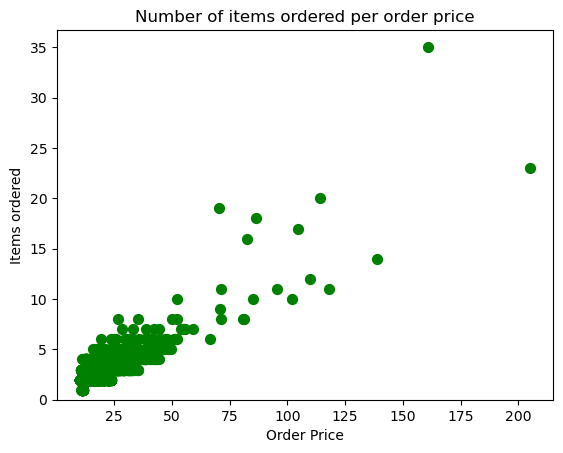

In [22]:
# create a list of prices
chipo.item_price = [float(value) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

#### Top 5 Expensive Items

In [27]:
groupbyitem = chipo.groupby('item_name').sum()

In [29]:
del groupbyitem['itempriceperquantity']

In [34]:
groupbyitem['itempriceperquantity'] = round(groupbyitem['item_price']/groupbyitem['quantity'])

In [35]:
groupbyitem.head()

,order_id,quantity,item_price,itempriceperquantity
item_name,,,,
6 Pack Soft Drink,52322,55,356.95,6.0
Barbacoa Bowl,53972,66,672.36,10.0
Barbacoa Burrito,74718,91,894.75,10.0
Barbacoa Crispy Tacos,5613,12,120.21,10.0
Barbacoa Salad Bowl,9708,10,106.40,11.0


In [40]:
groupbyitem.sort_values('itempriceperquantity', ascending=False, inplace=True)

groupbyitem.head()

,order_id,quantity,item_price,itempriceperquantity
item_name,,,,
Barbacoa Salad Bowl,9708,10,106.40,11.0
Carnitas Salad Bowl,6693,6,66.34,11.0
Steak Salad Bowl,29590,31,343.59,11.0
Carnitas Bowl,62742,71,736.71,10.0
Carnitas Burrito,51652,60,597.83,10.0


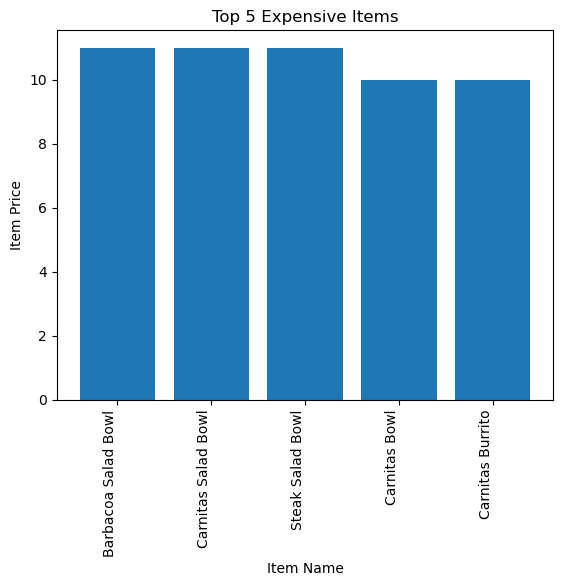

In [46]:
plt.bar(groupbyitem.index[:5], height= groupbyitem.itempriceperquantity[:5])

plt.xlabel('Item Name')
plt.ylabel('Item Price')
plt.title('Top 5 Expensive Items')

plt.xticks(ticks=range(len(groupbyitem.index[:5])), labels=groupbyitem.index[:5], rotation=90, ha='right')

plt.show()